[View in Colaboratory](https://colab.research.google.com/github/connected-bsamadi/colab-notebooks/blob/master/Most_Commonly_Used_Python_Packages_on_GitHub.ipynb)

# Introduction
In this notebook, Python packages are sorted based on the number of times they were imported on the [GitHub public dataset](https://www.kaggle.com/github/github-repos). The result is visualized using a [Seaborn](https://seaborn.pydata.org/) bar plot. 


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
from google.colab import auth
auth.authenticate_user()

In [0]:
from google.cloud import bigquery

project_id = 'ontario-2018'
client = bigquery.Client(project=project_id)

In [0]:
query = ('''SELECT
  package,
  COUNT(*) count
FROM (
  SELECT
    REGEXP_EXTRACT(line, r' ([a-z0-9\._]*)\.') package,
    id
  FROM (
    SELECT
      SPLIT(content, '\n') line,
      id
    FROM
      [bigquery-public-data:github_repos.sample_contents]
    WHERE
      content CONTAINS 'import'
      AND sample_path LIKE '%.py'
    HAVING
      LEFT(line, 6)='import' )
  GROUP BY
    package,
    id )
GROUP BY
  1
ORDER BY
  count DESC
LIMIT
  20;''')
job_config = bigquery.job.QueryJobConfig()
job_config.use_legacy_sql=True
query_job = client.query(query,job_config)  # API request - starts the query


In [0]:
python_packages=query_job.to_dataframe()

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


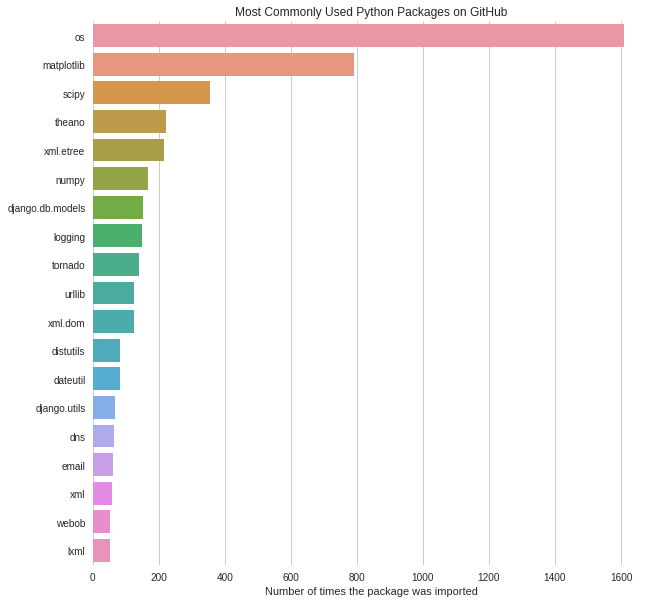

In [6]:
# Visualizing with Seaborn
sns.set(style="whitegrid")
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(10, 10))
# Plot the total crashes
sns.set_color_codes("pastel")
sns.barplot(x="count", y="package", data=python_packages, ci=None)

# Add informative axis labels
ax.set(ylabel="", xlabel="Number of times the package was imported", title="Most Commonly Used Python Packages on GitHub")
sns.despine(left=True, bottom=True)